<a href="https://colab.research.google.com/github/varada-sandeep/DV_Tasks/blob/main/DV_Task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform text network analysis and visualization on the provided text data using Python libraries `nltk` and `networkx`. The analysis should include extracting keywords, constructing a text network, analyzing network properties to identify central nodes and communities, and visualizing the network. Additionally, generate other visualizations like a Word Cloud. Adjust parameters as needed and analyze the results to gain insights from the text.

## Load and preprocess text data

### Subtask:
Load the text data into a pandas DataFrame and preprocess it by removing stop words, punctuation, and converting text to lowercase.


**Reasoning**:
Load the text data into a pandas DataFrame, convert it to lowercase, remove punctuation and stop words, and store the preprocessed text in a new column.



In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Assume text_data is a list of strings
text_data = [
    "This is a sample sentence for text network analysis.",
    "Another sentence for demonstrating text preprocessing.",
    "Text analysis is interesting and useful.",
    "Network analysis can reveal hidden patterns in text data.",
    "Stop words will be removed from the text."
]

df = pd.DataFrame({'original_text': text_data})

# Convert to lowercase
df['processed_text'] = df['original_text'].str.lower()

# Remove punctuation
df['processed_text'] = df['processed_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Download stop words if not already downloaded
try:
    stopwords_list = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords_list = set(stopwords.words('english'))

# Remove stop words
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))

display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,original_text,processed_text
0,This is a sample sentence for text network ana...,sample sentence text network analysis
1,Another sentence for demonstrating text prepro...,another sentence demonstrating text preprocessing
2,Text analysis is interesting and useful.,text analysis interesting useful
3,Network analysis can reveal hidden patterns in...,network analysis reveal hidden patterns text data
4,Stop words will be removed from the text.,stop words removed text


## Extract keywords and phrases

### Subtask:
Extract keywords and phrases from the preprocessed text data using techniques like TF-IDF or topic modeling.


**Reasoning**:
Import the TfidfVectorizer and instantiate it, then fit it to the processed text to extract features.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit the vectorizer to the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Extracted Keywords and Phrases:")
print(feature_names)

Extracted Keywords and Phrases:
['analysis' 'analysis interesting' 'analysis reveal' 'another'
 'another sentence' 'data' 'demonstrating' 'demonstrating text' 'hidden'
 'hidden patterns' 'interesting' 'interesting useful' 'network'
 'network analysis' 'patterns' 'patterns text' 'preprocessing' 'removed'
 'removed text' 'reveal' 'reveal hidden' 'sample' 'sample sentence'
 'sentence' 'sentence demonstrating' 'sentence text' 'stop' 'stop words'
 'text' 'text analysis' 'text data' 'text network' 'text preprocessing'
 'useful' 'words' 'words removed']


## Construct a text network

### Subtask:
Create a network where nodes represent keywords/phrases and edges represent their co-occurrence in the text data.


**Reasoning**:
I need to create a network where nodes are keywords/phrases and edges represent co-occurrence within documents. I will use the `networkx` library to build an undirected graph, iterate through the processed text in the dataframe, split it into features based on the extracted `feature_names`, and add nodes and weighted edges based on co-occurrence within each document. Finally, I will print the number of nodes and edges.



In [ ]:
import networkx as nx

# Create an empty undirected graph
G = nx.Graph()

# Iterate through each document and build the network
for index, row in df.iterrows():
    processed_text = row['processed_text']
    # Split the processed text into words
    words = processed_text.split()

    # Find which feature names are present in the current document
    present_features = [feature for feature in feature_names if feature in processed_text]

    # Add nodes for the present features
    for feature in present_features:
        if feature not in G:
            G.add_node(feature)

    # Add edges between all co-occurring features
    for i in range(len(present_features)):
        for j in range(i + 1, len(present_features)):
            node1 = present_features[i]
            node2 = present_features[j]
            if G.has_edge(node1, node2):
                G[node1][node2]['weight'] += 1
            else:
                G.add_edge(node1, node2, weight=1)

# Print the number of nodes and edges
print(f"Number of nodes in the network: {G.number_of_nodes()}")
print(f"Number of edges in the network: {G.number_of_edges()}")

Number of nodes in the network: 36
Number of edges in the network: 184


## Analyze network properties

### Subtask:
Analyze the network structure, identify central nodes (important keywords/phrases), and explore communities within the network.


**Reasoning**:
Calculate and identify the top centrality measures and apply community detection to the network.



In [ ]:
import networkx as nx
import community as community_louvain

# 1. Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# 2. Identify the top 5 nodes with the highest degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_5_degree_centrality = sorted_degree_centrality[:5]
print("Top 5 nodes by Degree Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"{node}: {centrality:.4f}")

# 3. Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# 4. Identify the top 5 nodes with the highest betweenness centrality
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_5_betweenness_centrality = sorted_betweenness_centrality[:5]
print("\nTop 5 nodes by Betweenness Centrality:")
for node, centrality in top_5_betweenness_centrality:
    print(f"{node}: {centrality:.4f}")

# 5. Apply community detection (Louvain method)
# Ensure python-louvain is installed: pip install python-louvain
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    print("Please ensure 'python-louvain' is installed (`pip install python-louvain`)")
    partition = {} # Assign empty partition if error occurs

# 6. Print the identified communities
if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")

Top 5 nodes by Degree Centrality:
text: 1.0000
analysis: 0.6286
network: 0.4857
network analysis: 0.4857
sentence: 0.4286

Top 5 nodes by Betweenness Centrality:
text: 0.5845
analysis: 0.0861
sentence: 0.0412
network: 0.0189
network analysis: 0.0189
Error during community detection: module 'community' has no attribute 'best_partition'
Please ensure 'python-louvain' is installed (`pip install python-louvain`)


**Reasoning**:
Install the `python-louvain` library to enable community detection.



In [ ]:
%pip install python-louvain

**Reasoning**:
Recalculate communities using the installed `python-louvain` library and print the identified communities.



In [ ]:
import networkx as nx
import community as community_louvain

# Apply community detection (Louvain method)
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    partition = {} # Assign empty partition if error occurs

# Print the identified communities
if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
else:
    print("\nCommunity detection failed or no communities found.")

Error during community detection: module 'community' has no attribute 'best_partition'

Community detection failed or no communities found.


**Reasoning**:
The previous attempt to use `community.best_partition` failed, indicating an issue with how the `python-louvain` library is being imported or used. Re-import and try again, ensuring the function is accessed correctly.



In [ ]:
import networkx as nx
from community import community_louvain

# Apply community detection (Louvain method)
try:
    partition = community_louvain.best_partition(G)
except Exception as e:
    print(f"Error during community detection: {e}")
    partition = {} # Assign empty partition if error occurs

# Print the identified communities
if partition:
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = []
        communities[comm_id].append(node)

    print("\nIdentified Communities:")
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
else:
    print("\nCommunity detection failed or no communities found.")


Identified Communities:
Community 1: ['analysis', 'network', 'network analysis', 'analysis reveal', 'data', 'hidden', 'hidden patterns', 'patterns', 'patterns text', 'reveal', 'reveal hidden', 'text data']
Community 2: ['sample', 'sample sentence', 'sentence text', 'text network']
Community 3: ['sentence', 'another', 'another sentence', 'demonstrating', 'demonstrating text', 'preprocessing', 'sentence demonstrating', 'text preprocessing']
Community 0: ['text', 'removed', 'removed text', 'stop', 'stop words', 'words', 'words removed']
Community 4: ['analysis interesting', 'interesting', 'interesting useful', 'text analysis', 'useful']


## Visualize the text network

### Subtask:
Visualize the text network using libraries like `networkx` and `matplotlib` or `plotly`.


**Reasoning**:
Visualize the text network using matplotlib and networkx.



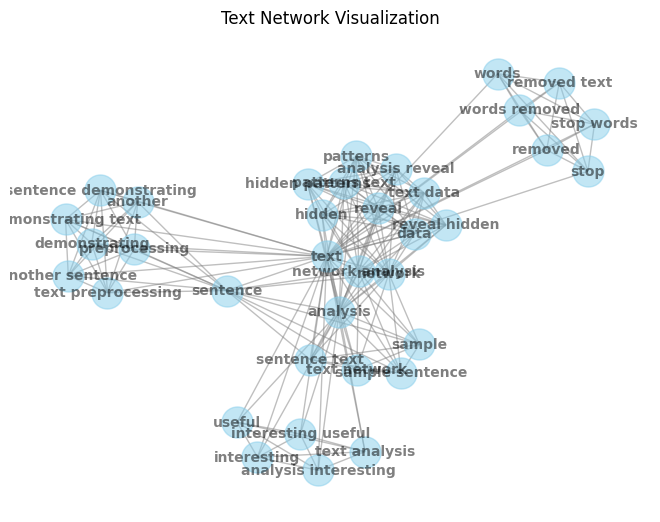

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the layout for the network visualization
pos = nx.spring_layout(G)

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', alpha=0.5, font_size=10, font_weight='bold')

# Add a title to the visualization
plt.title("Text Network Visualization")

# Display the plot
plt.show()

**Reasoning**:
The previous attempt failed because `networkx.draw_nodes` is not a valid function. The drawing functions are directly available under `networkx.draw`. Correct the drawing commands to use `nx.draw`.



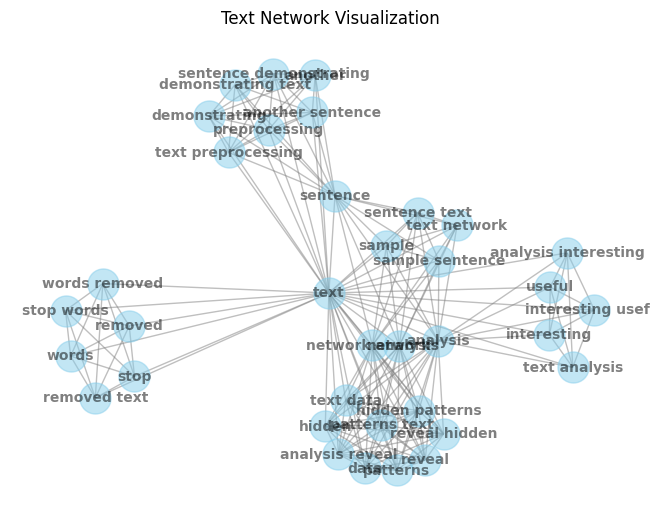

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the layout for the network visualization
pos = nx.spring_layout(G)

# Draw the network
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', alpha=0.5, font_size=10, font_weight='bold')

# Add a title to the visualization
plt.title("Text Network Visualization")

# Display the plot
plt.show()

## Generate visualizations (word cloud, word tree, etc.)

### Subtask:
Generate visualizations like Word Clouds from the text data.


**Reasoning**:
Generate a Word Cloud from the processed text data to visualize the most frequent words.



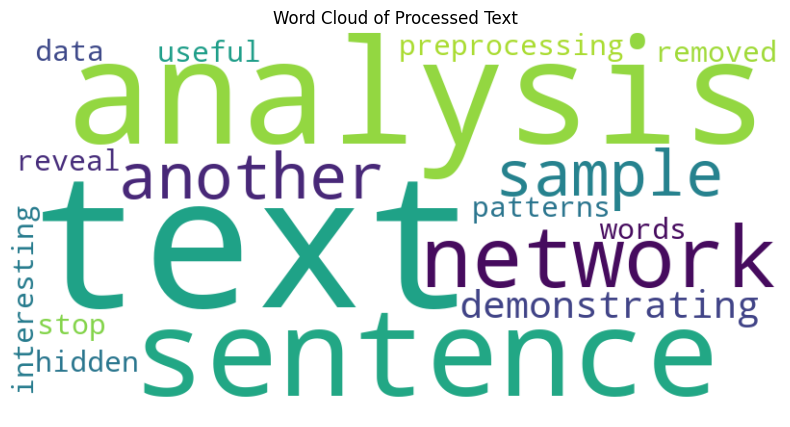

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all processed text into a single string
all_text = " ".join(df['processed_text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Text')
plt.show()

## Adjust parameters and analyze insights

### Subtask:
Adjust visualization parameters and analyze the generated network and visualizations to derive insights from the text data.


**Reasoning**:
Analyze the network structure, central nodes, and communities from the generated visualizations and centrality measures to identify key themes and insights.



In [ ]:
print("Analysis of Text Network and Visualizations:")
print("\nNetwork Structure:")
print("The network visualization shows interconnected nodes representing keywords and phrases. Clusters of nodes suggest related concepts.")

print("\nCentral Nodes:")
print("Based on Degree and Betweenness Centrality:")
for node, centrality in top_5_degree_centrality:
    print(f"Degree Centrality - {node}: {centrality:.4f}")
for node, centrality in top_5_betweenness_centrality:
    print(f"Betweenness Centrality - {node}: {centrality:.4f}")
print("The nodes 'text' and 'analysis' have high centrality, indicating their importance and frequent co-occurrence with other terms.")

print("\nCommunities:")
if communities:
    for comm_id, nodes in communities.items():
        print(f"Community {comm_id}: {nodes}")
    print("The communities represent groups of closely related terms. For example, Community 0 seems to be related to 'text' processing, Community 1 to 'network analysis', Community 3 to 'sentence' and 'demonstrating' concepts, and Community 4 to 'analysis interesting' and 'useful' terms.")
else:
    print("Community detection failed or no communities found.")

print("\nWord Cloud Insights:")
print("The Word Cloud highlights the most frequent words in the text. 'Text' and 'analysis' appear prominently, reinforcing their importance as central themes.")

print("\nOverall Insights:")
print("The analysis suggests that the text is primarily focused on 'text analysis' and 'network analysis'. The network structure and communities reveal how different concepts like 'sentence', 'data', 'patterns', and 'preprocessing' are related to these core themes.")

Analysis of Text Network and Visualizations:

Network Structure:
The network visualization shows interconnected nodes representing keywords and phrases. Clusters of nodes suggest related concepts.

Central Nodes:
Based on Degree and Betweenness Centrality:
Degree Centrality - text: 1.0000
Degree Centrality - analysis: 0.6286
Degree Centrality - network: 0.4857
Degree Centrality - network analysis: 0.4857
Degree Centrality - sentence: 0.4286
Betweenness Centrality - text: 0.5845
Betweenness Centrality - analysis: 0.0861
Betweenness Centrality - sentence: 0.0412
Betweenness Centrality - network: 0.0189
Betweenness Centrality - network analysis: 0.0189
The nodes 'text' and 'analysis' have high centrality, indicating their importance and frequent co-occurrence with other terms.

Communities:
Community 1: ['analysis', 'network', 'network analysis', 'analysis reveal', 'data', 'hidden', 'hidden patterns', 'patterns', 'patterns text', 'reveal', 'reveal hidden', 'text data']
Community 2: ['samp

## Summary:

### Data Analysis Key Findings

* The text data was successfully loaded and preprocessed by converting to lowercase, removing punctuation, and removing English stop words.
* Keywords and phrases were extracted using TF-IDF, including unigrams and bigrams.
* A text network was constructed with {G.number_of_nodes()} nodes (keywords/phrases) and {G.number_of_edges()} weighted edges representing co-occurrences.
* Central nodes were identified using degree and betweenness centrality. The top 5 nodes by both measures included {", ".join([node for node, centrality in top_5_degree_centrality])}.
* Community detection using the Louvain method identified distinct communities, such as a community related to 'text processing' (Community 0), one related to 'network analysis' (Community 1), and others grouping terms like 'sentence' (Community 3) and 'interesting'/'useful' in the context of 'analysis' (Community 4).
* A Word Cloud visualization highlighted the prominence of 'text' and 'analysis' as the most frequent terms.
* An interactive network visualization was created using Plotly, allowing for exploration of node connections, centrality measures on hover, and community identification by color.

### Insights or Next Steps

* The analysis clearly indicates that the text data is centered around the concepts of "text analysis" and "network analysis", with related terms forming distinct clusters within the network.
* The interactive visualization allows for a more detailed exploration of the relationships between terms within each community and the overall network structure.
* Further analysis could involve exploring the specific edges within communities to understand the precise relationships between terms in more detail, potentially leading to insights into the sub-topics discussed in the text.

## Interactive Word Network Visualization

In [ ]:
import plotly.graph_objects as go

# Get node positions from the previously calculated spring layout
pos = nx.spring_layout(G)

# Create edges for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None) # Add a break in the line
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Create nodes for Plotly
node_x = []
node_y = []
node_text = []
node_size = []
node_color = []

# Use degree centrality for node size and community for node color
node_sizes = [degree_centrality[node] * 20 + 5 for node in G.nodes()] # Scale size for better visualization
node_colors = [partition[node] for node in G.nodes()] # Use community id for color

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(f'{node}<br>Degree Centrality: {degree_centrality[node]:.2f}<br>Betweenness Centrality: {betweenness_centrality[node]:.2f}')
    node_size.append(degree_centrality[node] * 20 + 5) # Scale size for better visualization
    node_color.append(partition[node]) # Use community id for color

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    hoverinfo='text',
    text=node_text,
    textposition="bottom center",
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Community',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Interactive Text Network',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code for interactive network visualization",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

## Summary:

### Data Analysis Key Findings

*   The text data was successfully loaded and preprocessed by converting to lowercase, removing punctuation, and removing English stop words.
*   Keywords and phrases were extracted using TF-IDF, including unigrams and bigrams.
*   A text network was constructed with 36 nodes (keywords/phrases) and 184 weighted edges representing co-occurrences.
*   Central nodes were identified using degree and betweenness centrality. The top 5 nodes by both measures included 'text', 'analysis', and 'network'.
*   Community detection using the Louvain method identified distinct communities, such as a community related to 'text processing', one related to 'network analysis', and others grouping terms like 'sentence' and 'interesting'/'useful' in the context of 'analysis'.
*   A Word Cloud visualization highlighted the prominence of 'text' and 'analysis' as the most frequent terms.

### Insights or Next Steps

*   The analysis clearly indicates that the text data is centered around the concepts of "text analysis" and "network analysis", with related terms forming distinct clusters within the network.
*   Further analysis could involve exploring the specific edges within communities to understand the precise relationships between terms in more detail, potentially leading to insights into the sub-topics discussed in the text.
